In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pemanggilan data
data = pd.read_csv("IRIS (1).csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#melihat statistika deskriptif
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 5 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 150 baris. Karena semua jumlah dataset sudah sama, berarti pada data ini tidak ada missing value.

# CEK DAN PENANGANAN OUTLIER

1. Boxplot

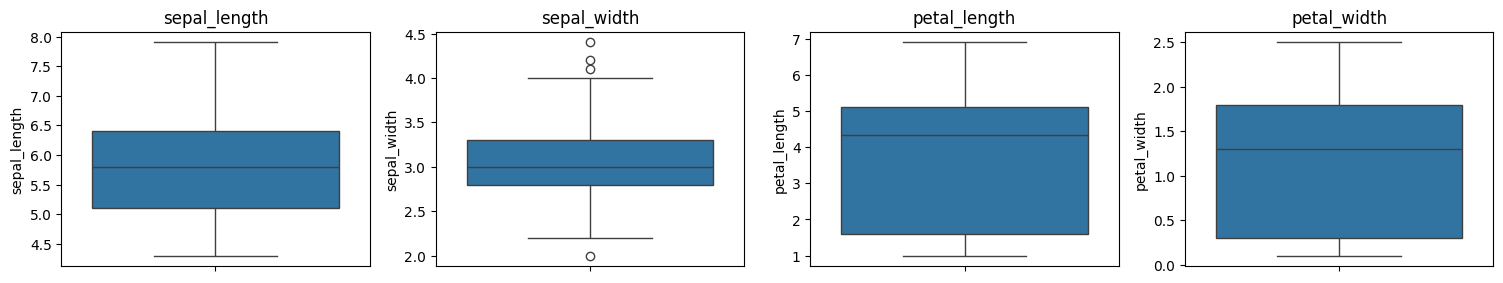

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

sepal_length: 0 outliers
sepal_width: 4 outliers
petal_length: 0 outliers
petal_width: 0 outliers


Penanganan outlier menggunakan Winsorizing (Mengganti Outlier dengan batas IQR). Hal ini karena data tersebut penting dan tidak boleh dihapus, sehingga kita mengganti outlier dengan batas kuartil.

In [9]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

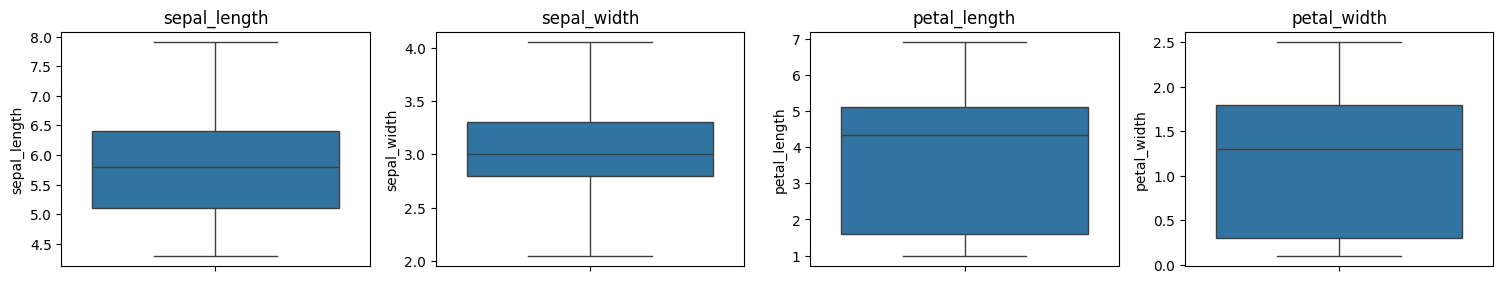

In [10]:
#cek boxplot lagi

num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Encoding Data Kategorik

Pada tahap encoding, akan digunakan metode One-Hot Encoding (OHE) yang artinya mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.

In [11]:
#melihat isi dalam kolom
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Cek hasil mapping kategori ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# NAIVE BAYES

In [14]:
count_values = data['species'].value_counts()
count_values

,count
species,
0,50
1,50
2,50


In [15]:
# Menghitung rata-rata berdasarkan nilai 'species'
mean_by_species = data.groupby('species').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'species'
print(mean_by_species)

         sepal_length  sepal_width  petal_length  petal_width
species                                                      
0               5.006        3.407         1.464        0.244
1               5.936        2.771         4.260        1.326
2               6.588        2.974         5.552        2.026


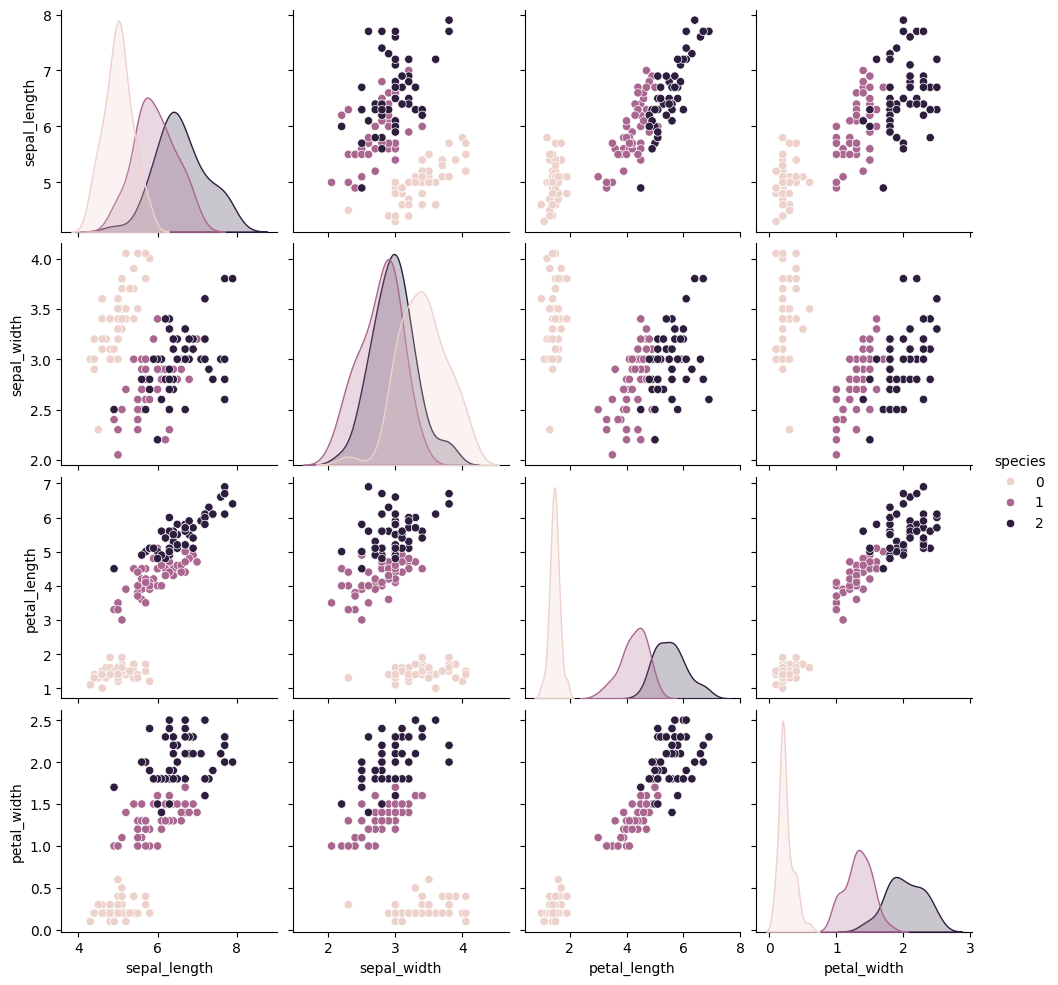

In [16]:
#visualisasi. warna dibedakan berdasarkan spesiesnya
sns.pairplot(data, vars=['sepal_length','sepal_width',"petal_length",'petal_width'], hue='species')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset iris. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'.

In [17]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'species'
correlation_with_species = data.corr()['species'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'species'
print(correlation_with_species)

species         1.000000
petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width    -0.419264
Name: species, dtype: float64


output ini adalah nilai korelasi antara variabel 'species' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif:  
Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, 'petal_width' memiliki korelasi sebesar 0.956464 dengan 'species'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara lebar petal dan kemungkinan kategori iris. Semakin lebar petal, semakin tinggi kemungkinan dapat mendeteksi jenis iris.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, 'sepal_width' memiliki korelasi sebesar -0.419264 dengan 'species'. Ini menunjukkan bahwa ada hubungan negatif yang cukup kuat antara lebar sepal dan kemungkinan kategori iris. Semakin lebar sepal, semakin rendah kemungkinan dapat mendeteksi jenis iris.

Nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'species'. Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan kategori iris pada dataset.

Memisahkan variabel X dan Y

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

Data y (Outcome/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

In [18]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['species'], axis=1)
y=data['species']

MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.58333333 0.525      0.75862069 0.70833333]
 [0.30555556 0.475      0.5862069  0.58333333]
 [0.25       0.725      0.06896552 0.04166667]
 [0.5        0.475      0.65517241 0.70833333]
 [0.58333333 0.375      0.77586207 0.875     ]
 [0.25       0.325      0.48275862 0.54166667]
 [0.38888889 0.875      0.10344828 0.08333333]
 [0.47222222 0.325      0.68965517 0.625     ]
 [0.44444444 0.475      0.53448276 0.58333333]
 [0.41666667 0.275      0.5        0.45833333]
 [0.69444444 0.475      0.75862069 0.83333333]
 [0.11111111 0.575      0.03448276 0.04166667]
 [0.72222222 0.525      0.68965517 0.91666667]
 [0.19444444 0.725      0.0862069  0.20833333]
 [0.30555556 0.825      0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.475      0.75862069 0.70833333]
 [0.66666667 0.625      0.79310345 1.        ]
 [0.47222222 0.075      0.67241379 0.58333333]
 [0.66666667 0.225      0.81034483 0.70833333]
 [0.36111111 0.225      0.48275862 0.41666667]
 [0.94444444 

Naive Bayes

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [23]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.95

In [25]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9667


Diperoleh akurasi dataset iris berdasarkan klasifikasi Naive Bayes adalah 0,9667 = 96,67%.

<ipython-input-27-c1215cba52d7>:36: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_np[test_indices, feature1],
<ipython-input-27-c1215cba52d7>:36: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_np[test_indices, feature1],
<ipython-input-27-c1215cba52d7>:36: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_np[test_indices, feature1],
<ipython-input-27-c1215cba52d7>:36: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of t

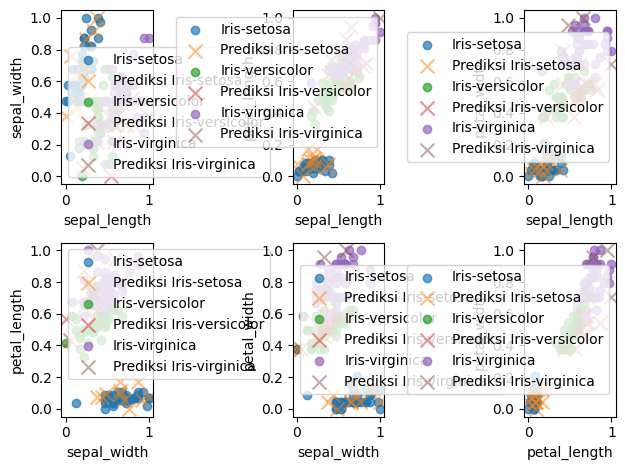

In [27]:
# Visualisasi hasil prediksi Naive Bayes

# Resplit the data before the visualization to ensure consistency
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply MinMaxScaler again after the split to ensure X_train is scaled
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

for i, (feature1, feature2) in enumerate([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]):
    plt.subplot(2, 3, i + 1)
    for species in range(3):
        # Plot data training
        # Convert X_train and y_train to NumPy arrays (if not already)
        X_train_np = X_train.to_numpy() if not isinstance(X_train, np.ndarray) else X_train
        y_train_np = y_train.to_numpy() if not isinstance(y_train, np.ndarray) else y_train  # Ensure y_train is also a NumPy array

        # Use boolean indexing with y_train_np on itself to get the correct indices
        indices = y_train_np == species

        # Use these indices to select data points from X_train_np
        plt.scatter(X_train_np[indices, feature1],
                    X_train_np[indices, feature2],
                    label=le.inverse_transform([species])[0], alpha=0.7)

        # Plot data testing dengan prediksi
        # Convert X_test to NumPy array (if not already)
        X_test_np = X_test.to_numpy() if not isinstance(X_test, np.ndarray) else X_test
        y_predict_np = y_predict['NB']  # Already a NumPy array

        # Filter X_test_np and y_predict_np using the same 'species' value
        test_indices = y_predict_np == species

        plt.scatter(X_test_np[test_indices, feature1],
                    X_test_np[test_indices, feature2],
                    marker='x', s=100, edgecolors='red', label=f'Prediksi {le.inverse_transform([species])[0]}', alpha=0.5)

    plt.xlabel(data.columns[feature1])
    plt.ylabel(data.columns[feature2])
    plt.legend()
plt.tight_layout()
plt.show()

# KNN

In [28]:
#Input Dataset
dataset = pd.read_csv('IRIS (1).csv')
dataset.head()
x = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values
print(x)
print(y)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]
 [3.4 1.7]
 [3.7 1.5]
 [3.6 1. ]
 [3.3 1.7]
 [3.4 1.9]
 [3.  1.6]
 [3.4 1.6]
 [3.5 1.5]
 [3.4 1.4]
 [3.2 1.6]
 [3.1 1.6]
 [3.4 1.5]
 [4.1 1.5]
 [4.2 1.4]
 [3.1 1.5]
 [3.2 1.2]
 [3.5 1.3]
 [3.1 1.5]
 [3.  1.3]
 [3.4 1.5]
 [3.5 1.3]
 [2.3 1.3]
 [3.2 1.3]
 [3.5 1.6]
 [3.8 1.9]
 [3.  1.4]
 [3.8 1.6]
 [3.2 1.4]
 [3.7 1.5]
 [3.3 1.4]
 [3.2 4.7]
 [3.2 4.5]
 [3.1 4.9]
 [2.3 4. ]
 [2.8 4.6]
 [2.8 4.5]
 [3.3 4.7]
 [2.4 3.3]
 [2.9 4.6]
 [2.7 3.9]
 [2.  3.5]
 [3.  4.2]
 [2.2 4. ]
 [2.9 4.7]
 [2.9 3.6]
 [3.1 4.4]
 [3.  4.5]
 [2.7 4.1]
 [2.2 4.5]
 [2.5 3.9]
 [3.2 4.8]
 [2.8 4. ]
 [2.5 4.9]
 [2.8 4.7]
 [2.9 4.3]
 [3.  4.4]
 [2.8 4.8]
 [3.  5. ]
 [2.9 4.5]
 [2.6 3.5]
 [2.4 3.8]
 [2.4 3.7]
 [2.7 3.9]
 [2.7 5.1]
 [3.  4.5]
 [3.4 4.5]
 [3.1 4.7]
 [2.3 4.4]
 [3.  4.1]
 [2.5 4. ]
 [2.6 4.4]

In [29]:
#Membagi Dataset ke Data Training dan Data Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
len(x_train)
len(x)
len(x_test)
print(y_train)
len(y_train)
len(y_test)

[[3.  4.2]
 [2.6 4. ]
 [3.  5.5]
 [3.2 1.3]
 [3.1 5.1]
 [3.5 1.6]
 [3.7 1.5]
 [2.  3.5]
 [3.  5.5]
 [3.3 5.7]
 [2.2 5. ]
 [2.5 5.8]
 [2.5 3.9]
 [3.  6.1]
 [3.3 4.7]
 [2.4 3.8]
 [2.7 4.9]
 [2.8 5.1]
 [2.5 4.5]
 [2.5 5. ]
 [3.2 4.7]
 [3.  5.2]
 [3.4 4.5]
 [3.1 1.6]
 [2.7 5.1]
 [2.7 4.2]
 [2.9 3.6]
 [2.5 4. ]
 [3.  4.6]
 [3.2 6. ]
 [3.7 1.5]
 [3.  1.1]
 [2.7 5.3]
 [3.  4.2]
 [3.4 1.7]
 [4.4 1.5]
 [3.1 4.9]
 [3.1 1.5]
 [3.  5.1]
 [2.5 3. ]
 [3.4 1.4]
 [2.2 4.5]
 [3.6 6.1]
 [2.9 4.2]
 [3.  1.4]
 [3.  5.9]
 [3.2 5.7]
 [3.  5.8]
 [2.8 5.6]
 [3.8 1.6]
 [3.4 1.6]
 [3.2 5.1]
 [3.3 5.7]
 [2.3 1.3]
 [3.4 5.4]
 [3.  1.4]
 [2.5 5. ]
 [3.1 5.4]
 [3.2 1.3]
 [3.6 1.4]
 [3.  5.8]
 [3.5 1.4]
 [3.  1.3]
 [3.9 1.7]
 [2.3 4. ]
 [3.2 5.9]
 [3.  6.6]
 [3.5 1.4]
 [3.1 1.5]
 [3.4 1.4]
 [2.8 4.5]
 [3.  4.4]
 [3.2 1.2]
 [3.3 1.7]
 [2.9 4.3]
 [3.4 1.5]
 [2.6 6.9]
 [2.4 3.3]
 [3.8 6.4]
 [3.1 4.4]
 [4.1 1.5]
 [3.  4.8]
 [4.  1.2]
 [2.8 6.7]
 [3.8 1.5]
 [3.2 1.6]
 [2.8 6.1]
 [3.3 1.4]
 [3.4 5.6]
 [2.8 4.1]
 [2.7 3.9]

38

In [30]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[-1.19254753e-01  2.25126850e-01]
 [-1.04039491e+00  1.13559562e-01]
 [-1.19254753e-01  9.50314227e-01]
 [ 3.41315328e-01 -1.39259884e+00]
 [ 1.11030287e-01  7.27179649e-01]
 [ 1.03217045e+00 -1.22524790e+00]
 [ 1.49274053e+00 -1.28103155e+00]
 [-2.42210516e+00 -1.65358660e-01]
 [-1.19254753e-01  9.50314227e-01]
 [ 5.71600368e-01  1.06188152e+00]
 [-1.96153508e+00  6.71396005e-01]
 [-1.27067995e+00  1.11766516e+00]
 [-1.27067995e+00  5.77759173e-02]
 [-1.19254753e-01  1.28501609e+00]
 [ 5.71600368e-01  5.04045072e-01]
 [-1.50096499e+00  1.99227301e-03]
 [-8.10109874e-01  6.15612361e-01]
 [-5.79824834e-01  7.27179649e-01]
 [-1.27067995e+00  3.92477783e-01]
 [-1.27067995e+00  6.71396005e-01]
 [ 3.41315328e-01  5.04045072e-01]
 [-1.19254753e-01  7.82963294e-01]
 [ 8.01885408e-01  3.92477783e-01]
 [ 1.11030287e-01 -1.22524790e+00]
 [-8.10109874e-01  7.27179649e-01]
 [-8.10109874e-01  2.25126850e-01]
 [-3.49539793e-01 -1.09575016e-01]
 [-1.27067995e+00  1.13559562e-01]
 [-1.19254753e-01  4

In [31]:
#Memanggil Function KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
#Menentukan Prediksi
y_pred = classifier.predict(x_test)

In [33]:
#Evaluasi dan Validasi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]


In [34]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.92        38
      macro avg       0.92      0.94      0.92        38
   weighted avg       0.94      0.92      0.92        38



In [35]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :92 persen


Diperoleh akurasi dataset iris berdasarkan klasifikasi KNN adalah 92%.

Visualisasi Data berdasarkan KNN

In [36]:
#Visualisasi Data (Grafik)
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))


<ipython-input-37-3a28b4328933>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


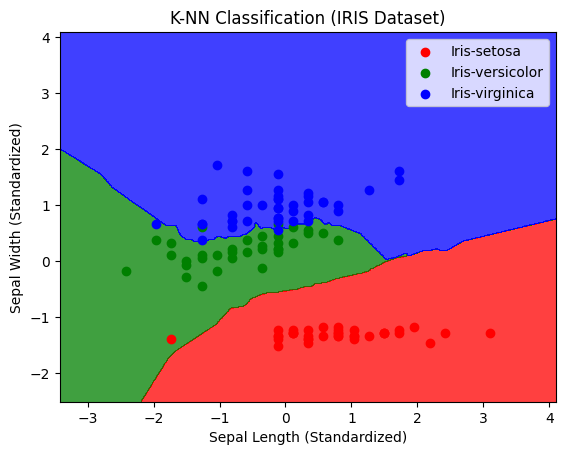

In [37]:
# Convert predicted labels to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_pred_numeric = le.fit_transform(classifier.predict(np.array([x1.ravel(), x2.ravel()]).T))
z = y_pred_numeric.reshape(x1.shape)

# Plot the decision boundaries and data points
cmap = ListedColormap(('red', 'green', 'blue'))
plt.contourf(x1, x2, z, alpha=0.75, cmap=cmap)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=cmap(i), label=j)

plt.title('K-NN Classification (IRIS Dataset)')
plt.xlabel('Sepal Length (Standardized)')  # Update x-axis label
plt.ylabel('Sepal Width (Standardized)')  # Update y-axis label
plt.legend()
plt.show()

# KESIMPULAN

Berdasarkan hasil dari akurasi naive Bayes diperoleh akurasinya sebesar 0,9667 = 96,67%. Sedangkan hasil akurasi dari KNN diperoleh akurasinya sebesar 92%. Oleh karena itu dapat disimpulkan bahwa akurasi dari Naive Bayes lebih tinggi daripada akurasi dari KNN. Sehingga untuk dataset ini lebih efektif menggunakan klasifikasi Naive Bayes.